In [1]:
import os
import json
import rasterio
import rasterio.features
import shapely.geometry
import pandas as pd
from affine import Affine
import numpy as np
from matplotlib import pyplot as plt
import csv
import rasterio.mask

from rasterio.coords import BoundingBox
from rasterio import windows
from rasterio import warp
from rasterio import mask

import rasterio.plot as plot
from matplotlib.patches import Rectangle
import folium

In [2]:
src = rasterio.open('SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif', 'r')
print(src.height,src.width,src.transform,src.crs)

18000 28800 | 0.00, 0.00, 60.00|
| 0.00,-0.00, 75.00|
| 0.00, 0.00, 1.00| EPSG:4326


In [3]:
with rasterio.open('SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif') as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(mask, transform=dataset.transform):

            # Transform shapes from the dataset's own coordinate
            # reference system to CRS84 (EPSG:4326).
            geom = rasterio.warp.transform_geom( dataset.crs, 'EPSG:4326', geom, precision=6)

                    # Print GeoJSON shapes to stdout.
            print(geom)

{'type': 'Polygon', 'coordinates': [[[59.997917, 75.002083], [59.997917, 0.002083], [179.997918, 0.002083], [179.997918, 75.002083], [59.997917, 75.002083]]]}


In [4]:
data=json.load(open("india.json"))
geoms=data['geometry']

In [6]:
geo=geoms['coordinates']

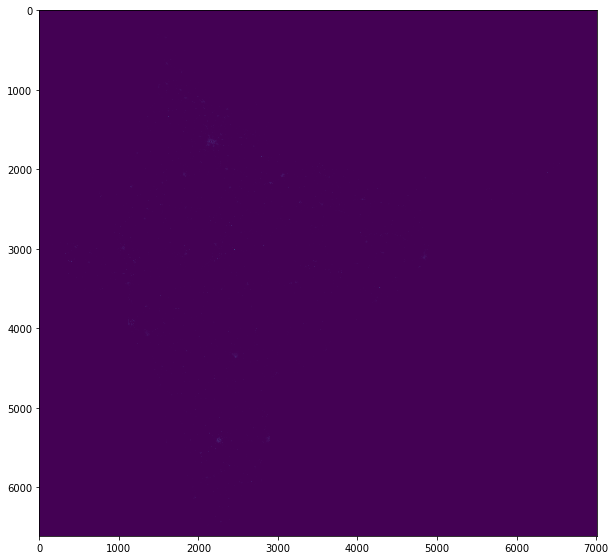

In [8]:
roi_polygon_src_coords = warp.transform_geom({'init': 'epsg:4326'},
                                             src.crs,                                            
                                             {"type": "Polygon", 
                                              "coordinates": geo})

out_image,out_transform = rasterio.mask.mask(src,
                                     [roi_polygon_src_coords],
                                             all_touched=True, 
                                             nodata=0.0,
                                             crop=True)

out_image = np.clip(out_image[2::-1],0,2200)/2200

plt.figure(figsize=(10,10))
plt.imshow(out_image[0])

In [9]:
data=json.load(open("india.json"))
geoms=[data['geometry']]

with rasterio.open("SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif") as src:
        out_image1,out_transform = rasterio.mask.mask(src, geoms, all_touched=True, nodata=0.0,crop=True)
        out_meta=src.meta

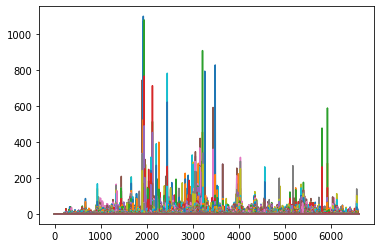

In [11]:
plt.plot(out_image1[0])
plt.show()

In [13]:
with rasterio.open("SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif") as src:
        out_image1,out_transform,z = rasterio.mask.raster_geometry_mask(src,geoms, all_touched=True, invert=False, crop=True)

In [14]:
out_image1

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [15]:
out_transform

Affine(0.0041666667, 0.0, 68.17291673205,
       0.0, -0.0041666667, 35.49791635065)

In [16]:
z

Window(col_off=1962, row_off=9481, width=7016, height=6608)